# 스피어만 상관분석

스피어만 상관계수는 두 변수 간의 순위 순서를 기반으로 상관관계를 측정

순위 데이터 또는 서열 데이터에서 사용되며, 정확한 값보다 상대적인 순위가 중요한 경우에 사용

값 자체보다는 값의 상대적인 순위가 중요

> 자동차 성능 순위나 음악 차트 등의 데이터 유형

피어슨 상관계수보다는 이상치에 강건하며, 비선형적인 관계도 잘 캡처할 수 있음.

값의 범위는 -1에서 1까지이며, 피어슨 상관계수와 마찬가지로 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계를 의미하며, 0에 가까울수록 상관관계가 없음을 의미함

> 아래 예제의 모든 데이터셋은 정규성과 등분산성을 충족한다고 가정한다.

## #01. 준비작업

### [1] 패키지 참조

In [10]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from scipy.stats import spearmanr

### [2] 데이터 가져오기

In [2]:
origin = read_excel("https://data.hossam.kr/mldata/mtcars.xlsx", index_col='name')
origin.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### [3] 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 전처리

종속변수(`mpg`)와 서열 척도에 해당하는 변수들을 추출함

In [4]:
df = origin[['mpg', 'vs', 'am', 'gear', 'carb']]
df.head()

,mpg,vs,am,gear,carb
name,,,,,
Mazda RX4,21.0,0,1,4,4
Mazda RX4 Wag,21.0,0,1,4,4
Datsun 710,22.8,1,1,4,1
Hornet 4 Drive,21.4,1,0,3,1
Hornet Sportabout,18.7,0,0,3,2


## #03. 산점도 행렬 시각화

서열 순위에 따라 데이터가 몰려 있기 때문에 파악이 쉽지 않다.

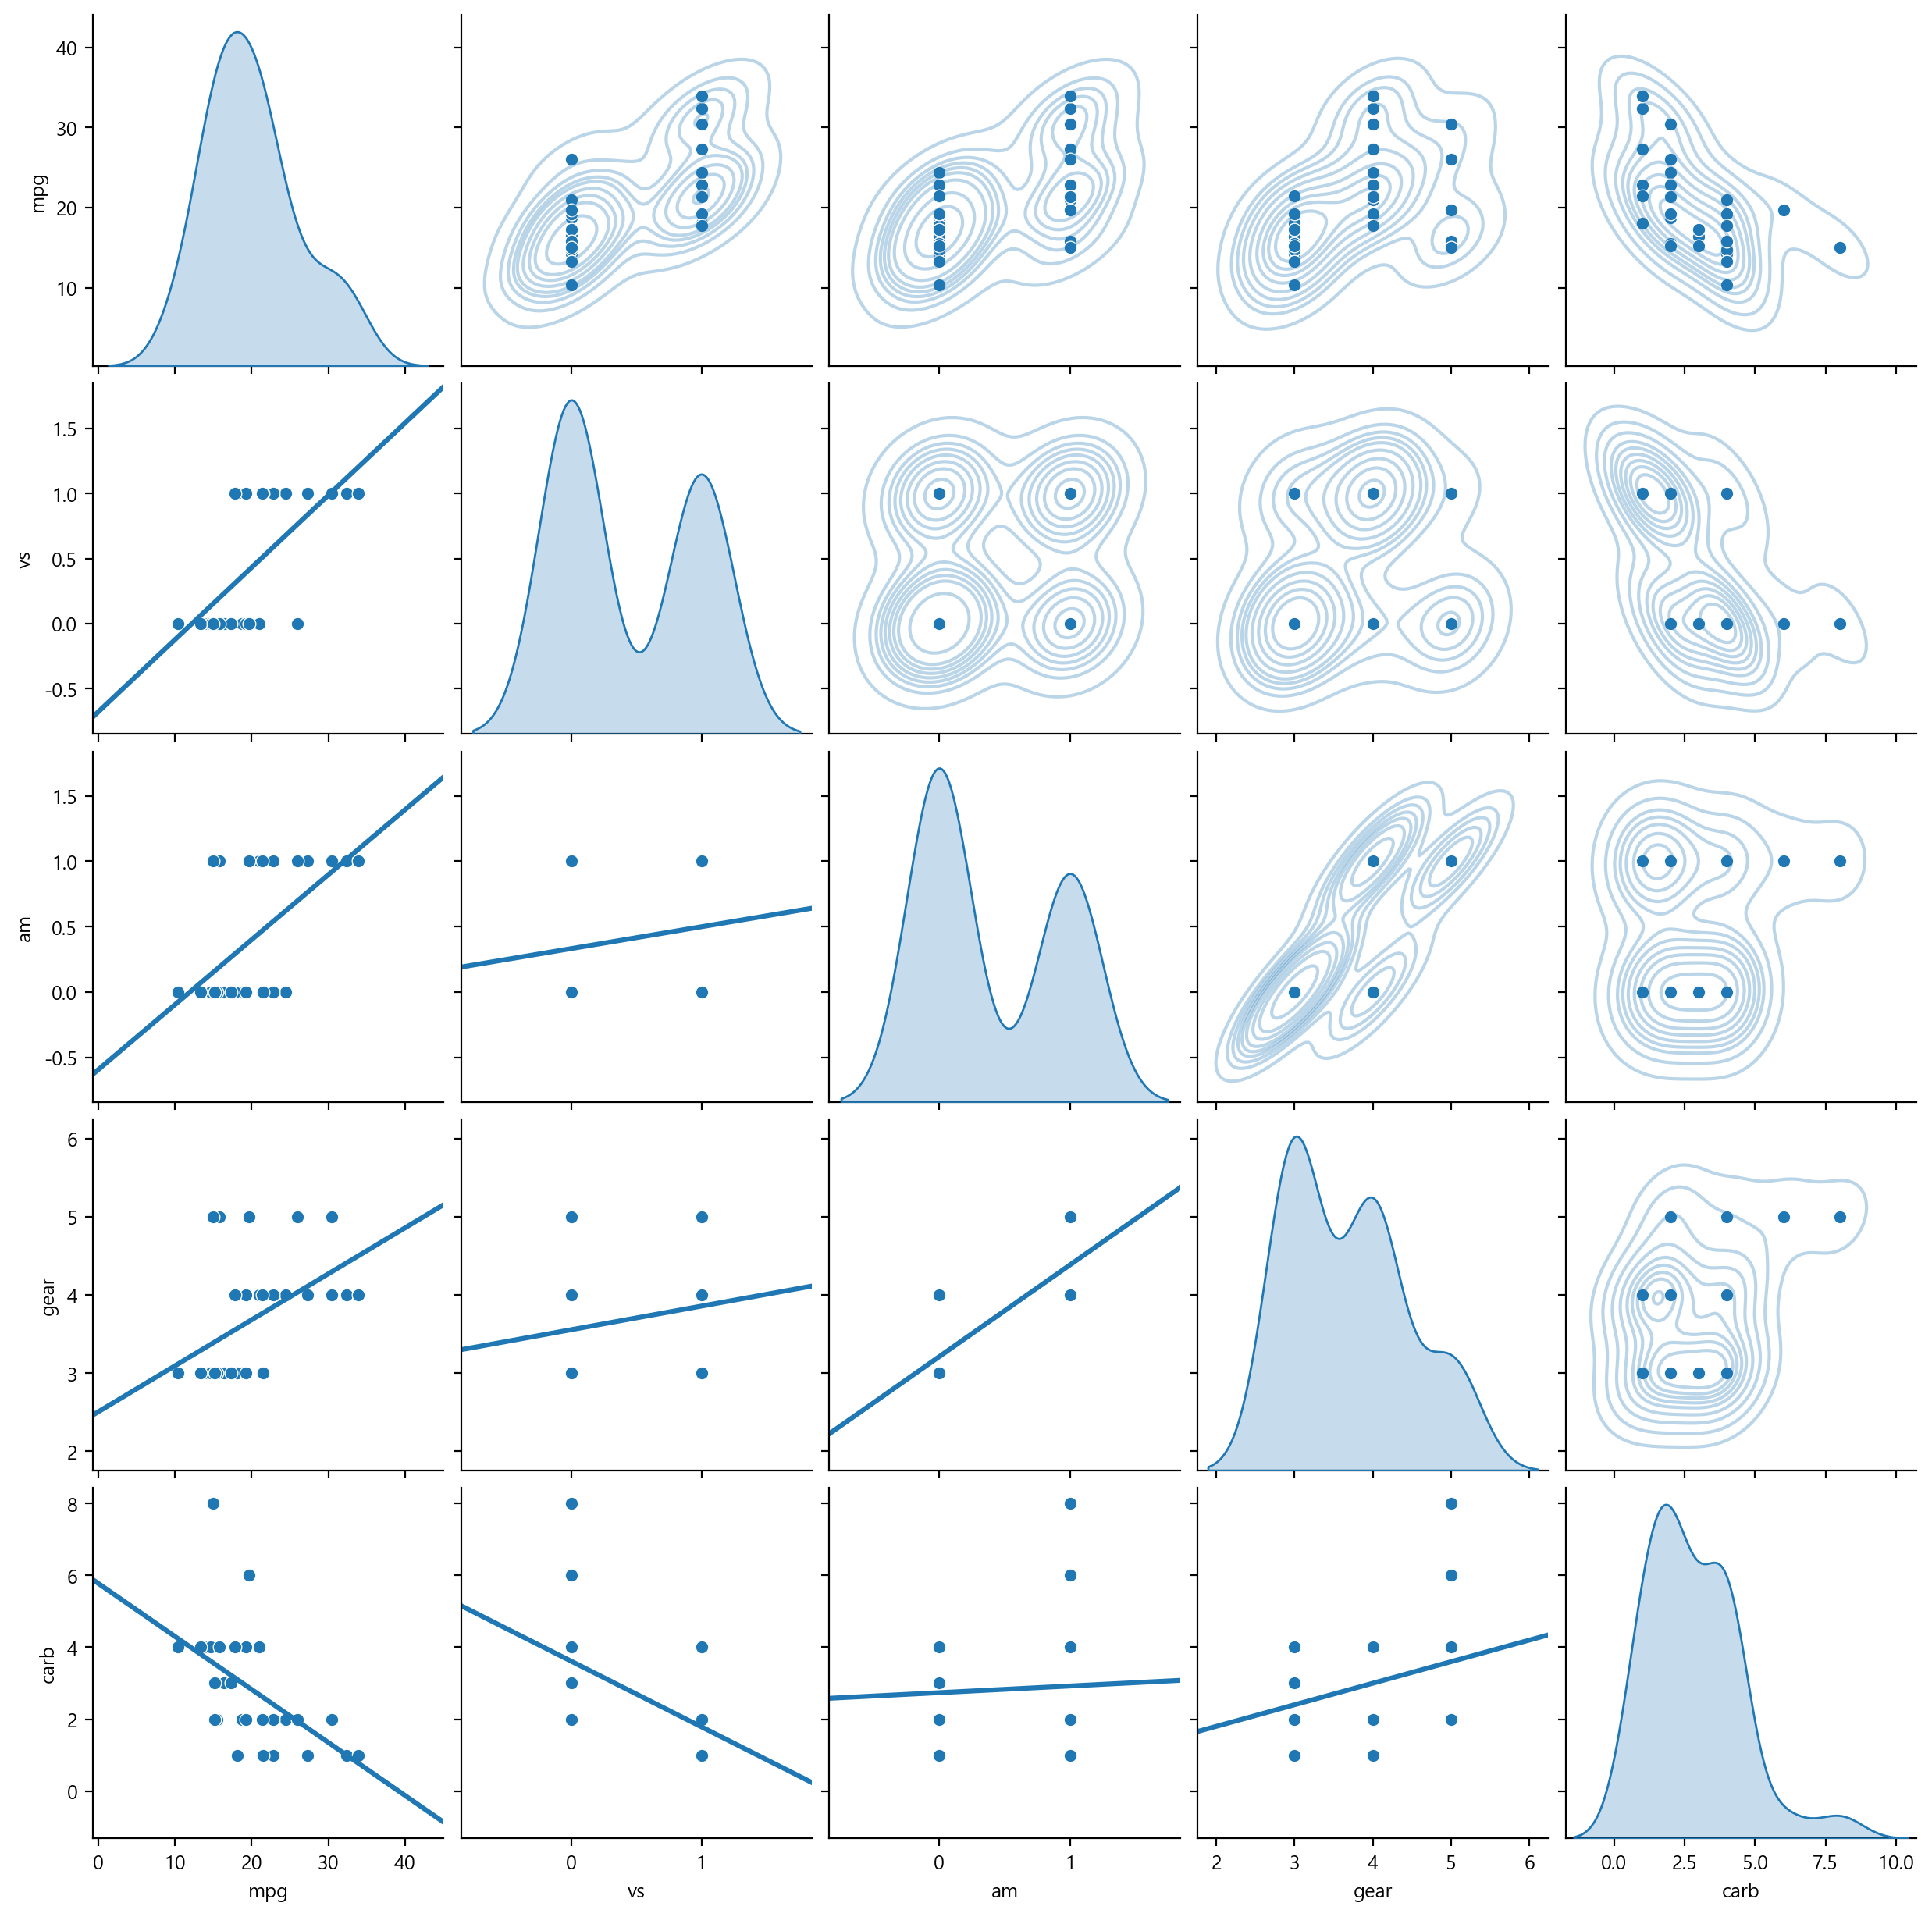

In [5]:
g = sb.pairplot(df, diag_kind='kde', palette='pastel')

# 대각선 위쪽에는 커널밀도추정, 아래쪽에는 회귀선 표시
g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate=False, ci=False)

plt.show()
plt.close()

### 상관계수, p-value 넣어주기 (기타)

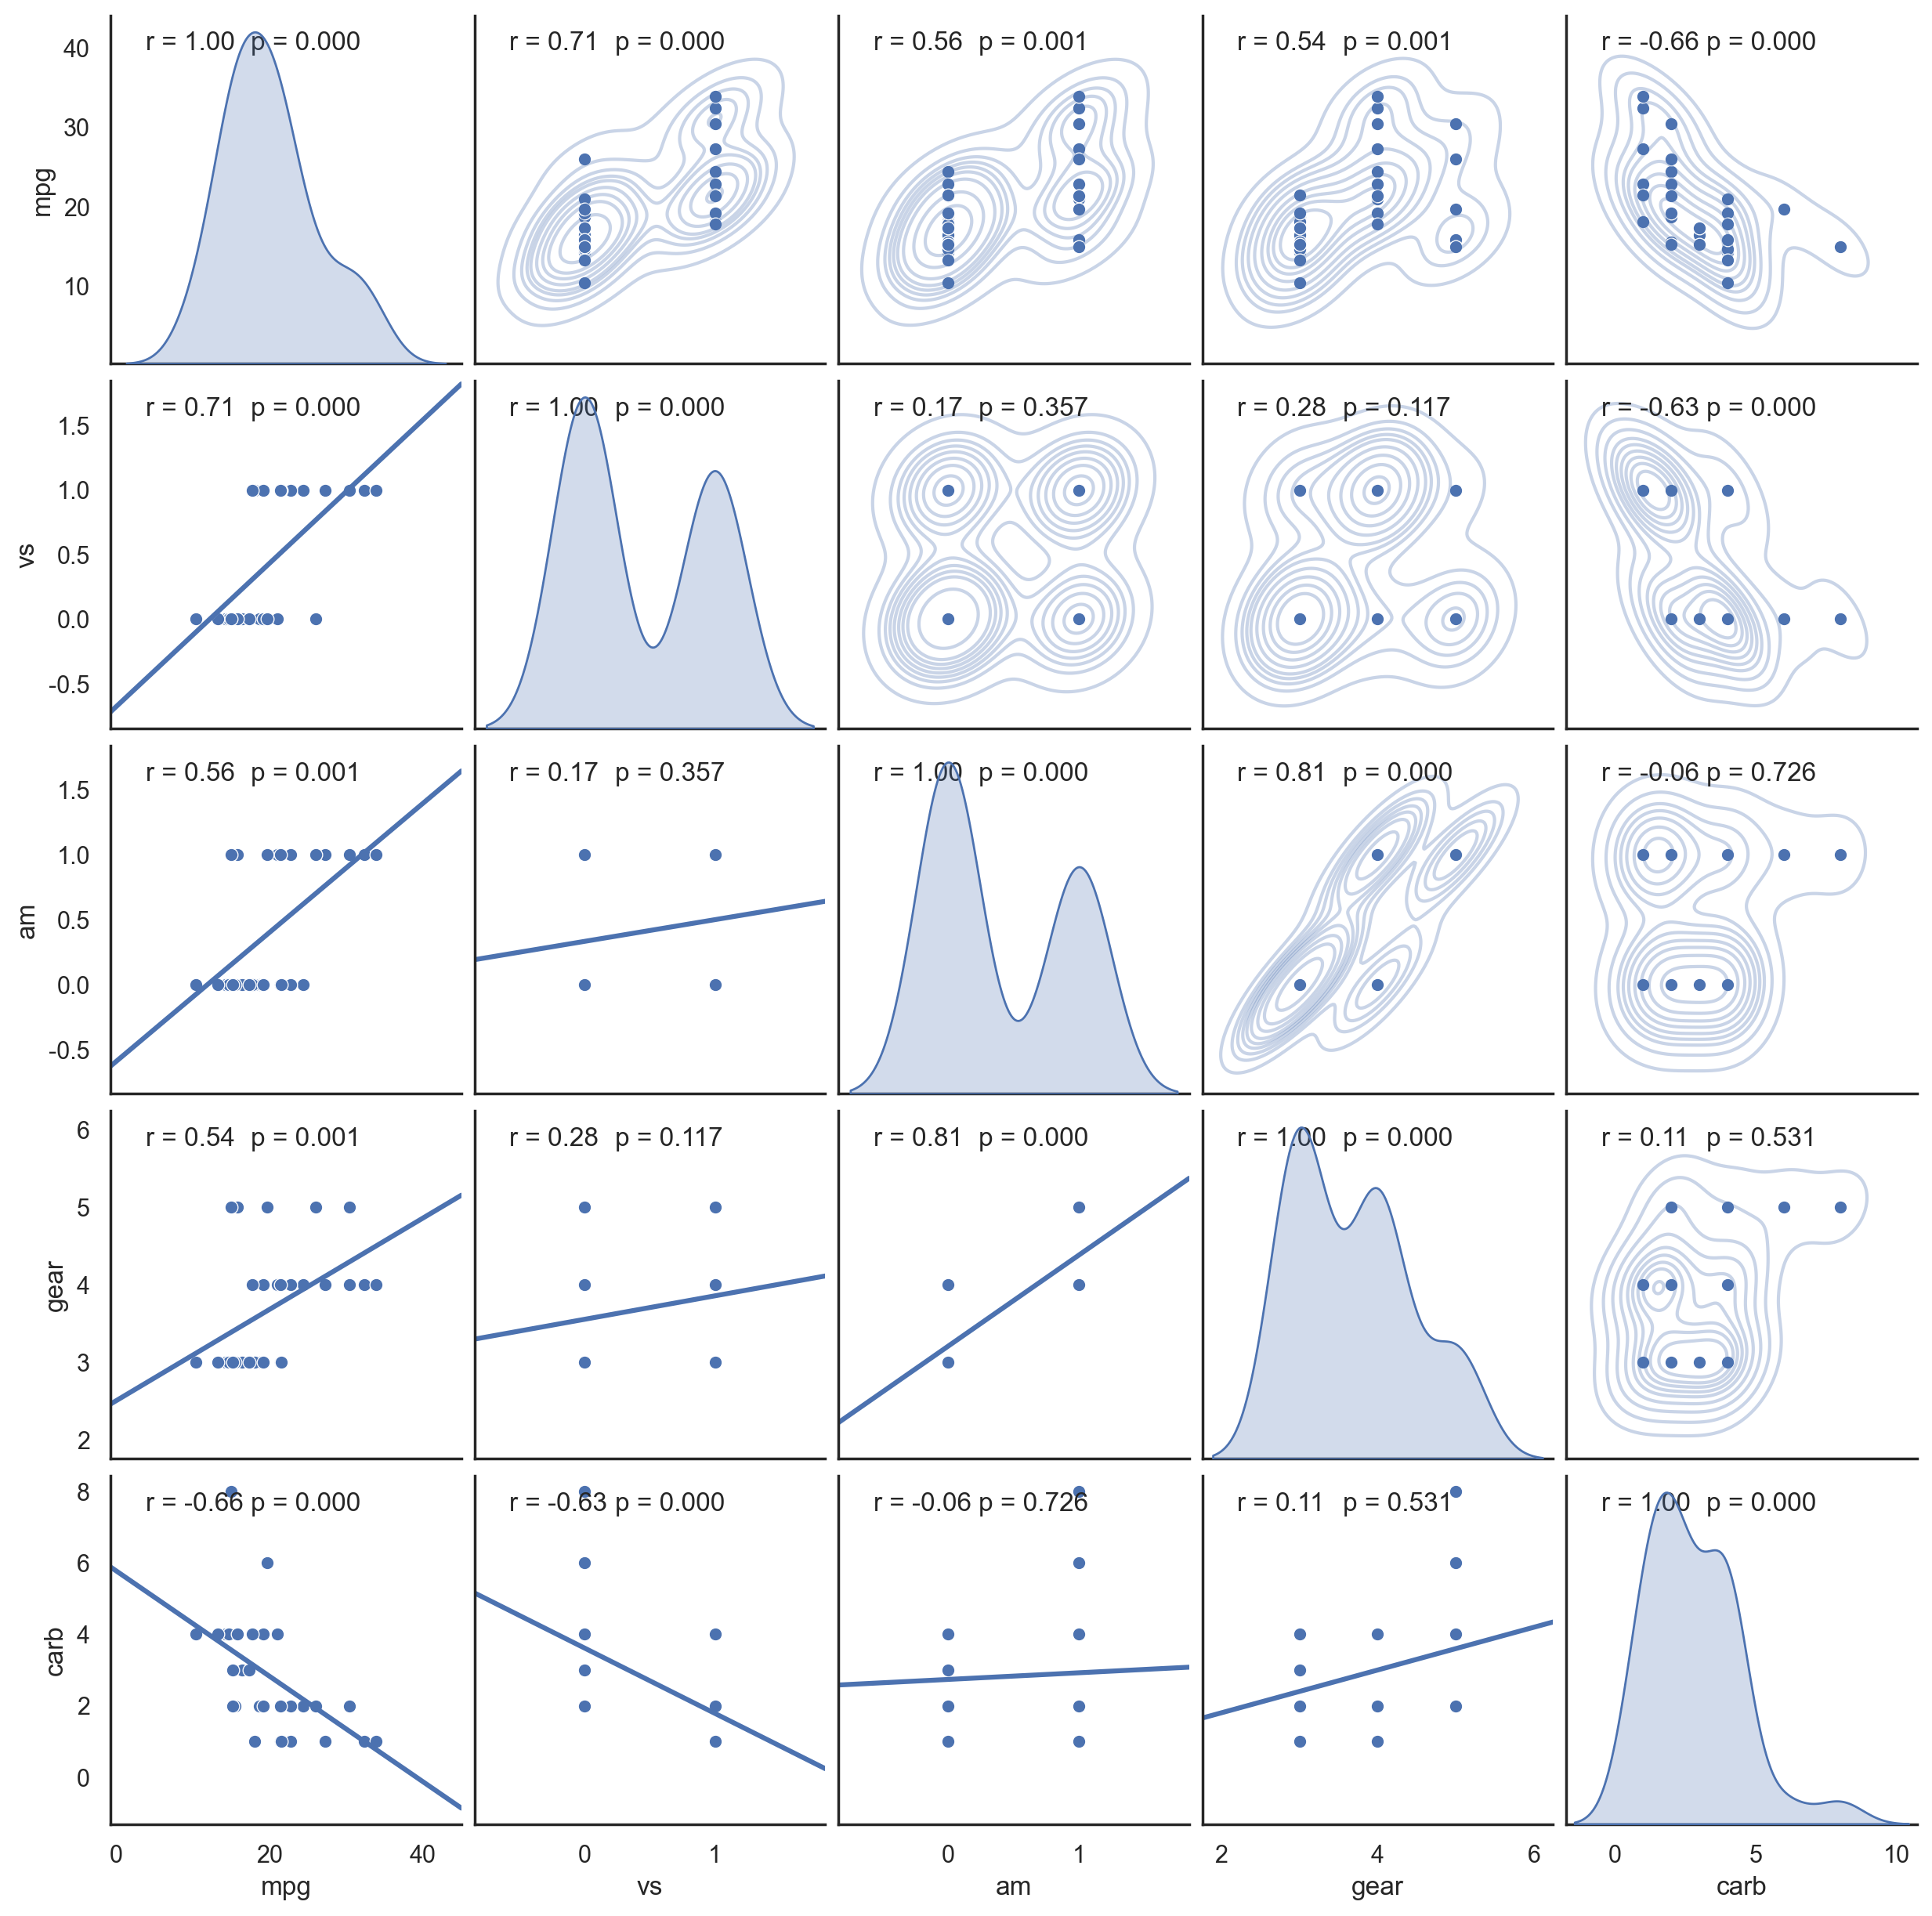

In [25]:


def corrfunc(x, y, **kws):
    r, p = spearmanr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)


g = sb.pairplot(df, diag_kind='kde', palette='pastel')
# 대각선 위쪽에는 커널밀도추정, 아래쪽에는 회귀선 표시
g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate=False, ci=False)
g.map(corrfunc)
plt.show()

## #04. 스피어만 상관분석

### [1] 상관계수 구하기

#### (1) 산점도 행렬

`method='spearman'`을 설정한다.

In [6]:
corr = df.corr(method='spearman')
corr

,mpg,vs,am,gear,carb
mpg,1.000000,0.706597,0.562006,0.542782,-0.657498
vs,0.706597,1.000000,0.168345,0.282662,-0.633695
am,0.562006,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,0.282662,0.807688,1.000000,0.114887
carb,-0.657498,-0.633695,-0.064365,0.114887,1.000000


#### (2) 산점도 행렬 시각화

앞에서 구한 산점도 행렬을 활용한다.

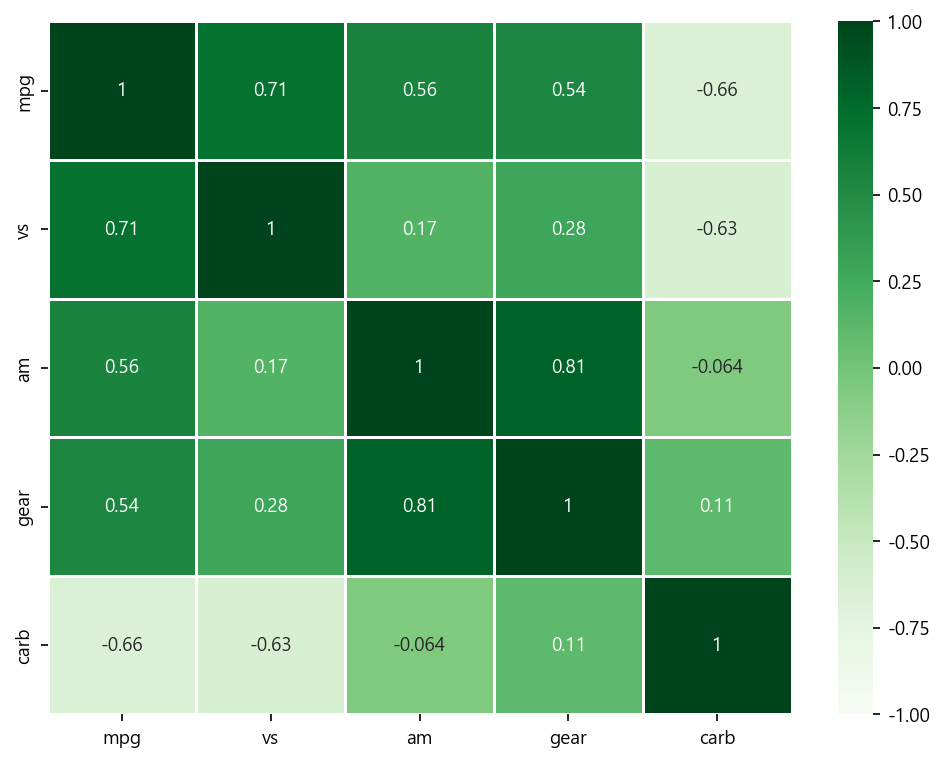

In [7]:
plt.figure(figsize=(8, 6), dpi=150)
sb.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

#### (3) 상관계수 행렬 시각화 (p value 추가)

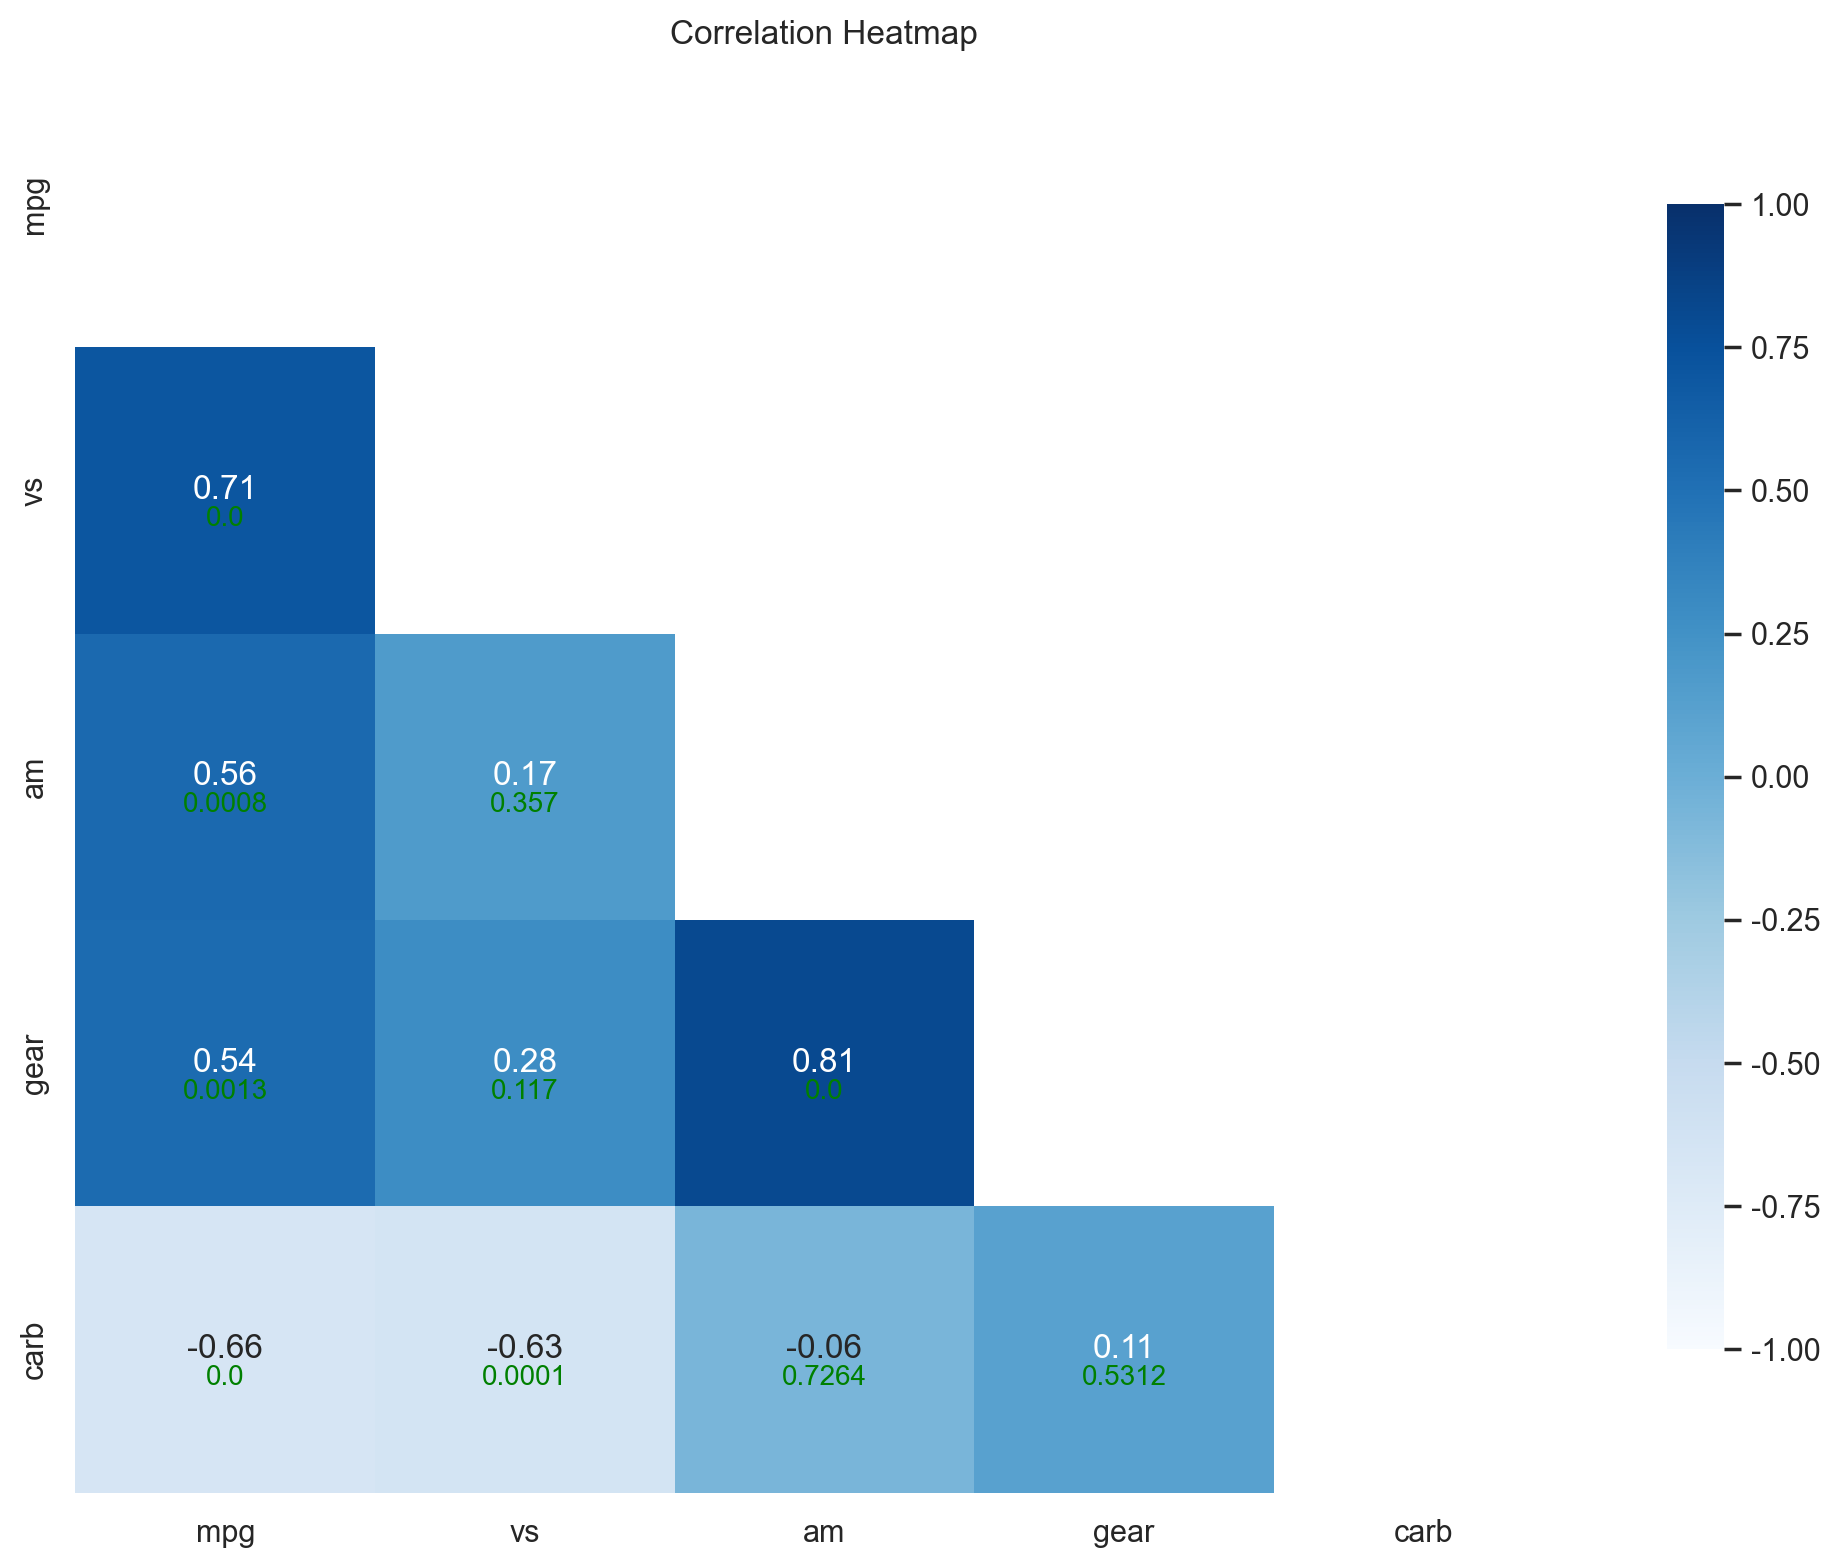

In [23]:

# Calculate the correlation matrix using Pearson correlation coefficients
corr_matrix = df.corr(method='spearman')

# Calculate the p-values for the correlation coefficients
pvalues = round(df.corr(method=lambda x, y: spearmanr(x, y)[1]), 4)

# Generate the heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sb.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', mask=mask, cbar_kws={'shrink': 0.8},
            ax=ax, vmin=-1, vmax=1, center=0)

# Update the heatmap labels with correlation coefficients and p-values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i >= j:
            continue
        corr = '{:f}'.format(corr_matrix.iloc[i, j]),
        pval = pvalues.iloc[i, j]
        ax.text(j+0.5, i+0.5, corr, ha='center', va='center', fontsize=10, color='white')
        ax.text(i+0.5, j+0.6, pval, ha='center', va='center', fontsize=10, color='green')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()

### [2] 결과 검정

In [8]:
names = df.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    # 기본적으로 i 다음 위치를 의미하지만 i가 마지막 인덱스일 경우 0으로 설정
    j = i + 1 if i < n - 1 else 0

    fields = names[i] + ' vs ' + names[j]
    s, p = spearmanr(df[names[i]], df[names[j]])
    result = p < pv

    data.append({'fields': fields, 'statistic': s, 'pvalue': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf

,statistic,pvalue,result
fields,,,
mpg vs vs,0.706597,6.191450e-06,True
vs vs am,0.168345,3.570439e-01,False
am vs gear,0.807688,2.304063e-08,True
gear vs carb,0.114887,5.312358e-01,False
carb vs mpg,-0.657498,4.337570e-05,True
